In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cohort_retention.csv')

In [ ]:
print(df.head())

  cohort_month  order_month  num_customers  retention_rate
0   2010-12-01            0            948          1.0000
1   2010-12-01            1            362          0.3819
2   2010-12-01            2            317          0.3344
3   2010-12-01            3            367          0.3871
4   2010-12-01            4            341          0.3597


In [ ]:
df['cohort_month'] = pd.to_datetime(df['cohort_month'])

In [ ]:
retention_pivot = df.pivot(index='cohort_month', columns='order_month', values='retention_rate')

In [ ]:
retention_pivot.head()

order_month,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12-01,1.0,0.3819,0.3344,0.3871,0.3597,0.3966,0.3797,0.3544,0.3544,0.3945,0.3734,0.5000,0.2743
2011-01-01,1.0,0.2399,0.2827,0.2423,0.3278,0.2993,0.2613,0.2565,0.3112,0.3468,0.3682,0.1496,NaN
2011-02-01,1.0,0.2474,0.1921,0.2789,0.2684,0.2474,0.2553,0.2816,0.2579,0.3132,0.0921,NaN,NaN
2011-03-01,1.0,0.1909,0.2545,0.2182,0.2318,0.1773,0.2636,0.2386,0.2886,0.0886,NaN,NaN,NaN
2011-04-01,1.0,0.2274,0.2207,0.2107,0.2074,0.2375,0.2308,0.2609,0.0836,NaN,NaN,NaN,NaN


In [ ]:
# 첫 달은 모두 100%이므로 제외
df_filtered = df[df['order_month'] != 0]

In [ ]:
# 각 코호트별 최대, 최소, 평균, 표준편차, 분산
stats_cohort = df_filtered.groupby('cohort_month')['retention_rate'].agg(
    max_retention='max',
    min_retention='min',
    mean_retention='mean',
    std_retention='std',
    var_retention='var'
).reset_index()

In [ ]:
stats_cohort

,cohort_month,max_retention,min_retention,mean_retention,std_retention,var_retention
0,2010-12-01,0.5000,0.2743,0.374200,0.051834,0.002687
1,2011-01-01,0.3682,0.1496,0.280509,0.060673,0.003681
2,2011-02-01,0.3132,0.0921,0.243430,0.061575,0.003792
3,2011-03-01,0.2886,0.0886,0.216900,0.059303,0.003517
4,2011-04-01,0.2609,0.0836,0.209875,0.053694,0.002883
5,2011-05-01,0.2652,0.1039,0.201214,0.055560,0.003087
6,2011-06-01,0.3362,0.1021,0.225517,0.079852,0.006376
7,2011-07-01,0.2723,0.1152,0.206300,0.057554,0.003313
8,2011-08-01,0.2515,0.1377,0.223050,0.056900,0.003238
9,2011-09-01,0.3255,0.1208,0.248333,0.111257,0.012378


In [ ]:
# order_month별 최대, 최소, 평균, 표준편차, 분산
stats_offset = df_filtered.groupby('order_month')['retention_rate'].agg(
    max_retention='max',
    min_retention='min',
    mean_retention='mean',
    std_retention='std',
    var_retention='var'
).reset_index()


In [ ]:
stats_offset

,order_month,max_retention,min_retention,mean_retention,std_retention,var_retention
0,1,0.3819,0.1340,0.240867,0.060371,0.003645
1,2,0.3344,0.1307,0.232318,0.064066,0.004105
2,3,0.3871,0.1208,0.238420,0.070369,0.004952
3,4,0.3597,0.1377,0.251889,0.066027,0.004360
4,5,0.3966,0.1152,0.256650,0.088364,0.007808
5,6,0.3797,0.1021,0.251143,0.081269,0.006605
6,7,0.3544,0.1039,0.249317,0.081892,0.006706
7,8,0.3544,0.0836,0.259140,0.104245,0.010867
8,9,0.3945,0.0886,0.285775,0.135616,0.018392
9,10,0.3734,0.0921,0.277900,0.160929,0.025898


In [ ]:
# 인덱스를 'YYYY-MM-DD' 형식의 문자열로 변환 (연-월-일만 표시)
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')

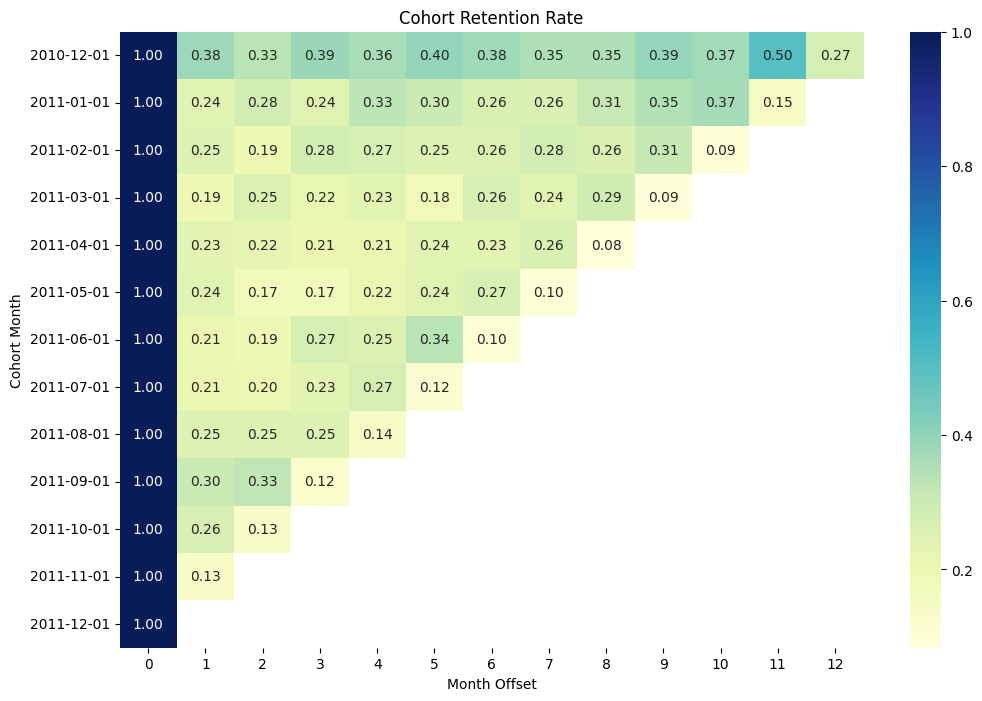

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cohort Retention Rate')
plt.xlabel('Month Offset')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
# order_month 컬럼이 정수형이 아닐 경우 정수형으로 변환
df['order_month'] = df['order_month'].astype(int)

# 각 주문의 실제 주문 날짜를 계산: cohort_month에 order_month만큼의 개월을 더함
df['order_date'] = df.apply(lambda row: row['cohort_month'] + pd.DateOffset(months=row['order_month']), axis=1)

# 실제 주문 날짜에서 '달' 정보를 추출 (1~12)
df['order_month_of_year'] = df['order_date'].dt.month

# 첫 달(0개월, 리텐션율 1.0)은 분석 제외 (원하는 경우)
df_filtered = df[df['order_month'] != 0]

# 달력상의 주문 월별 리텐션율 통계 계산
seasonality_stats = df_filtered.groupby('order_month_of_year')['retention_rate'].agg(
    mean_retention='mean',
    std_retention='std',
    min_retention='min',
    max_retention='max'
).reset_index()

In [ ]:
seasonality_stats

,order_month_of_year,mean_retention,std_retention,min_retention,max_retention
0,1,0.381900,NaN,0.3819,0.3819
1,2,0.287150,0.066822,0.2399,0.3344
2,3,0.305733,0.072642,0.2474,0.3871
3,4,0.246250,0.079335,0.1909,0.3597
4,5,0.297040,0.066796,0.2274,0.3966
5,6,0.270483,0.061843,0.2182,0.3797
6,7,0.240871,0.057926,0.1720,0.3544
7,8,0.227438,0.060561,0.1720,0.3544
8,9,0.270167,0.057141,0.2042,0.3945
9,10,0.271860,0.050759,0.2304,0.3734


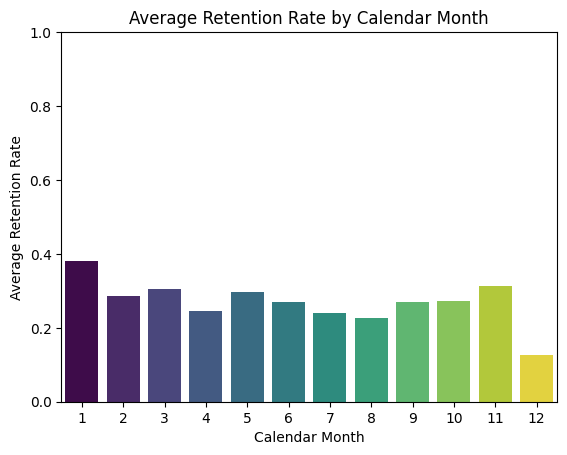

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(
    data=seasonality_stats,
    x='order_month_of_year',
    y='mean_retention',
    hue='order_month_of_year',
    palette='viridis',
    dodge=False
)
ax.legend_.remove()
plt.title("Average Retention Rate by Calendar Month")
plt.xlabel("Calendar Month")
plt.ylabel("Average Retention Rate")
plt.ylim(0, 1)
plt.show()


In [ ]:
# 'cohort_month'를 datetime 형식으로 변환
df['cohort_month'] = pd.to_datetime(df['cohort_month'])

# 주문 오프셋(order_month)이 정수형이 아닐 경우 변환
df['order_month'] = df['order_month'].astype(int)

# 1,2,3,4개월차 데이터만 필터링
df_filtered = df[df['order_month'].isin([1,2,3,4])]

# 코호트 월별로 1,2,3,4개월차의 평균 리텐션율 계산
retention_by_cohort = df_filtered.groupby(['cohort_month', 'order_month'])['retention_rate'].mean().reset_index()

# 피벗 테이블 형태로 재구성하여 각 코호트 월별 리텐션율 확인
retention_pivot = retention_by_cohort.pivot(index='cohort_month', columns='order_month', values='retention_rate')

# 2011년 6월(또는 그 이전)까지만 필터링
retention_pivot = retention_pivot.loc[retention_pivot.index <= '2011-06-01']

print(retention_pivot)

order_month        1       2       3       4
cohort_month                                
2010-12-01    0.3819  0.3344  0.3871  0.3597
2011-01-01    0.2399  0.2827  0.2423  0.3278
2011-02-01    0.2474  0.1921  0.2789  0.2684
2011-03-01    0.1909  0.2545  0.2182  0.2318
2011-04-01    0.2274  0.2207  0.2107  0.2074
2011-05-01    0.2366  0.1720  0.1720  0.2151
2011-06-01    0.2085  0.1872  0.2723  0.2468


In [ ]:
retention_pivot

order_month,1,2,3,4
cohort_month,,,,
2010-12-01,0.3819,0.3344,0.3871,0.3597
2011-01-01,0.2399,0.2827,0.2423,0.3278
2011-02-01,0.2474,0.1921,0.2789,0.2684
2011-03-01,0.1909,0.2545,0.2182,0.2318
2011-04-01,0.2274,0.2207,0.2107,0.2074
2011-05-01,0.2366,0.1720,0.1720,0.2151
2011-06-01,0.2085,0.1872,0.2723,0.2468


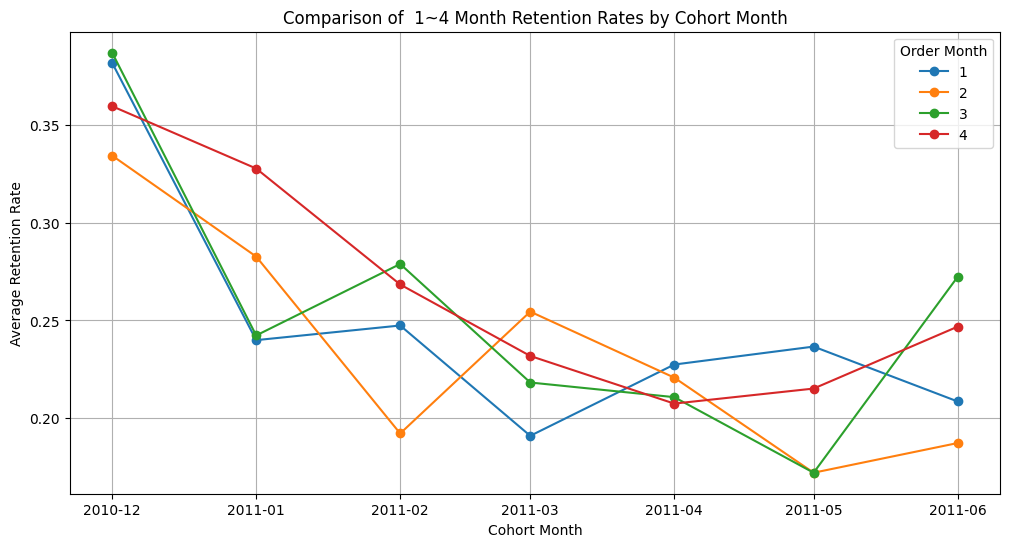

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(retention_pivot.index, retention_pivot[1], marker='o', label="1")
plt.plot(retention_pivot.index, retention_pivot[2], marker='o', label="2")
plt.plot(retention_pivot.index, retention_pivot[3], marker='o', label="3")
plt.plot(retention_pivot.index, retention_pivot[4], marker='o', label="4")
plt.xlabel("Cohort Month")
plt.ylabel("Average Retention Rate")
plt.title("Comparison of  1~4 Month Retention Rates by Cohort Month")
plt.legend(title="Order Month")
plt.grid(True)
plt.show()

In [ ]:
# 'cohort_month'를 datetime 형식으로 변환
df['cohort_month'] = pd.to_datetime(df['cohort_month'])

# 주문 오프셋(order_month)이 정수형이 아닐 경우 변환
df['order_month'] = df['order_month'].astype(int)

# 1~6개월차 데이터만 필터링
df_filtered = df[df['order_month'].isin([1,2,3,4,5,6])]

# 코호트 월별로 1~6개월차의 평균 리텐션율 계산
retention_by_cohort = df_filtered.groupby(['cohort_month', 'order_month'])['retention_rate'].mean().reset_index()

# 피벗 테이블 형태로 재구성하여 각 코호트 월별 리텐션율 확인
retention_pivot3 = retention_by_cohort.pivot(index='cohort_month', columns='order_month', values='retention_rate')

# 2011년 4월(또는 그 이전)까지만 필터링
retention_pivot3 = retention_pivot3.loc[retention_pivot3.index <= '2011-04-01']

print(retention_pivot3)

order_month        1       2       3       4       5       6
cohort_month                                                
2010-12-01    0.3819  0.3344  0.3871  0.3597  0.3966  0.3797
2011-01-01    0.2399  0.2827  0.2423  0.3278  0.2993  0.2613
2011-02-01    0.2474  0.1921  0.2789  0.2684  0.2474  0.2553
2011-03-01    0.1909  0.2545  0.2182  0.2318  0.1773  0.2636
2011-04-01    0.2274  0.2207  0.2107  0.2074  0.2375  0.2308


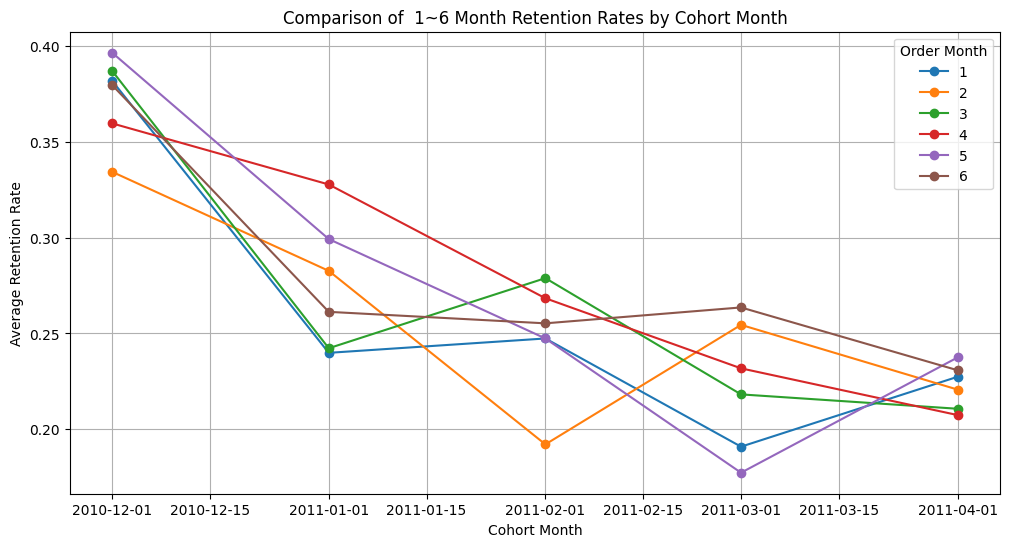

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(retention_pivot3.index, retention_pivot3[1], marker='o', label="1")
plt.plot(retention_pivot3.index, retention_pivot3[2], marker='o', label="2")
plt.plot(retention_pivot3.index, retention_pivot3[3], marker='o', label="3")
plt.plot(retention_pivot3.index, retention_pivot3[4], marker='o', label="4")
plt.plot(retention_pivot3.index, retention_pivot3[5], marker='o', label="5")
plt.plot(retention_pivot3.index, retention_pivot3[6], marker='o', label="6")
plt.xlabel("Cohort Month")
plt.ylabel("Average Retention Rate")
plt.title("Comparison of  1~6 Month Retention Rates by Cohort Month")
plt.legend(title="Order Month")
plt.grid(True)
plt.show()

In [ ]:
# 'cohort_month'를 datetime 형식으로 변환하고, 'order_month'는 정수형으로 변환
df['cohort_month'] = pd.to_datetime(df['cohort_month'])
df['order_month'] = df['order_month'].astype(int)

# 코호트와 order_month별로 정렬 (각 코호트 내에서 order_month 순서대로)
df.sort_values(['cohort_month', 'order_month'], inplace=True)

# 각 코호트별로 retention_rate의 월간 전환율(percentage change)을 계산
# 첫 달(보통 order_month == 0)은 기준이 되므로 변화율 계산에서 제외됨
df['pct_change_retention'] = df.groupby('cohort_month')['retention_rate'].pct_change()

print("계산된 데이터:")
df

계산된 데이터:


,cohort_month,order_month,num_customers,retention_rate,order_date,order_month_of_year,pct_change_retention
0,2010-12-01,0,948,1.0000,2010-12-01,12,NaN
1,2010-12-01,1,362,0.3819,2011-01-01,1,-0.618100
2,2010-12-01,2,317,0.3344,2011-02-01,2,-0.124378
3,2010-12-01,3,367,0.3871,2011-03-01,3,0.157596
4,2010-12-01,4,341,0.3597,2011-04-01,4,-0.070783
...,...,...,...,...,...,...,...
86,2011-10-01,1,93,0.2642,2011-11-01,11,-0.735800
87,2011-10-01,2,46,0.1307,2011-12-01,12,-0.505299
88,2011-11-01,0,321,1.0000,2011-11-01,11,NaN
89,2011-11-01,1,43,0.1340,2011-12-01,12,-0.866000


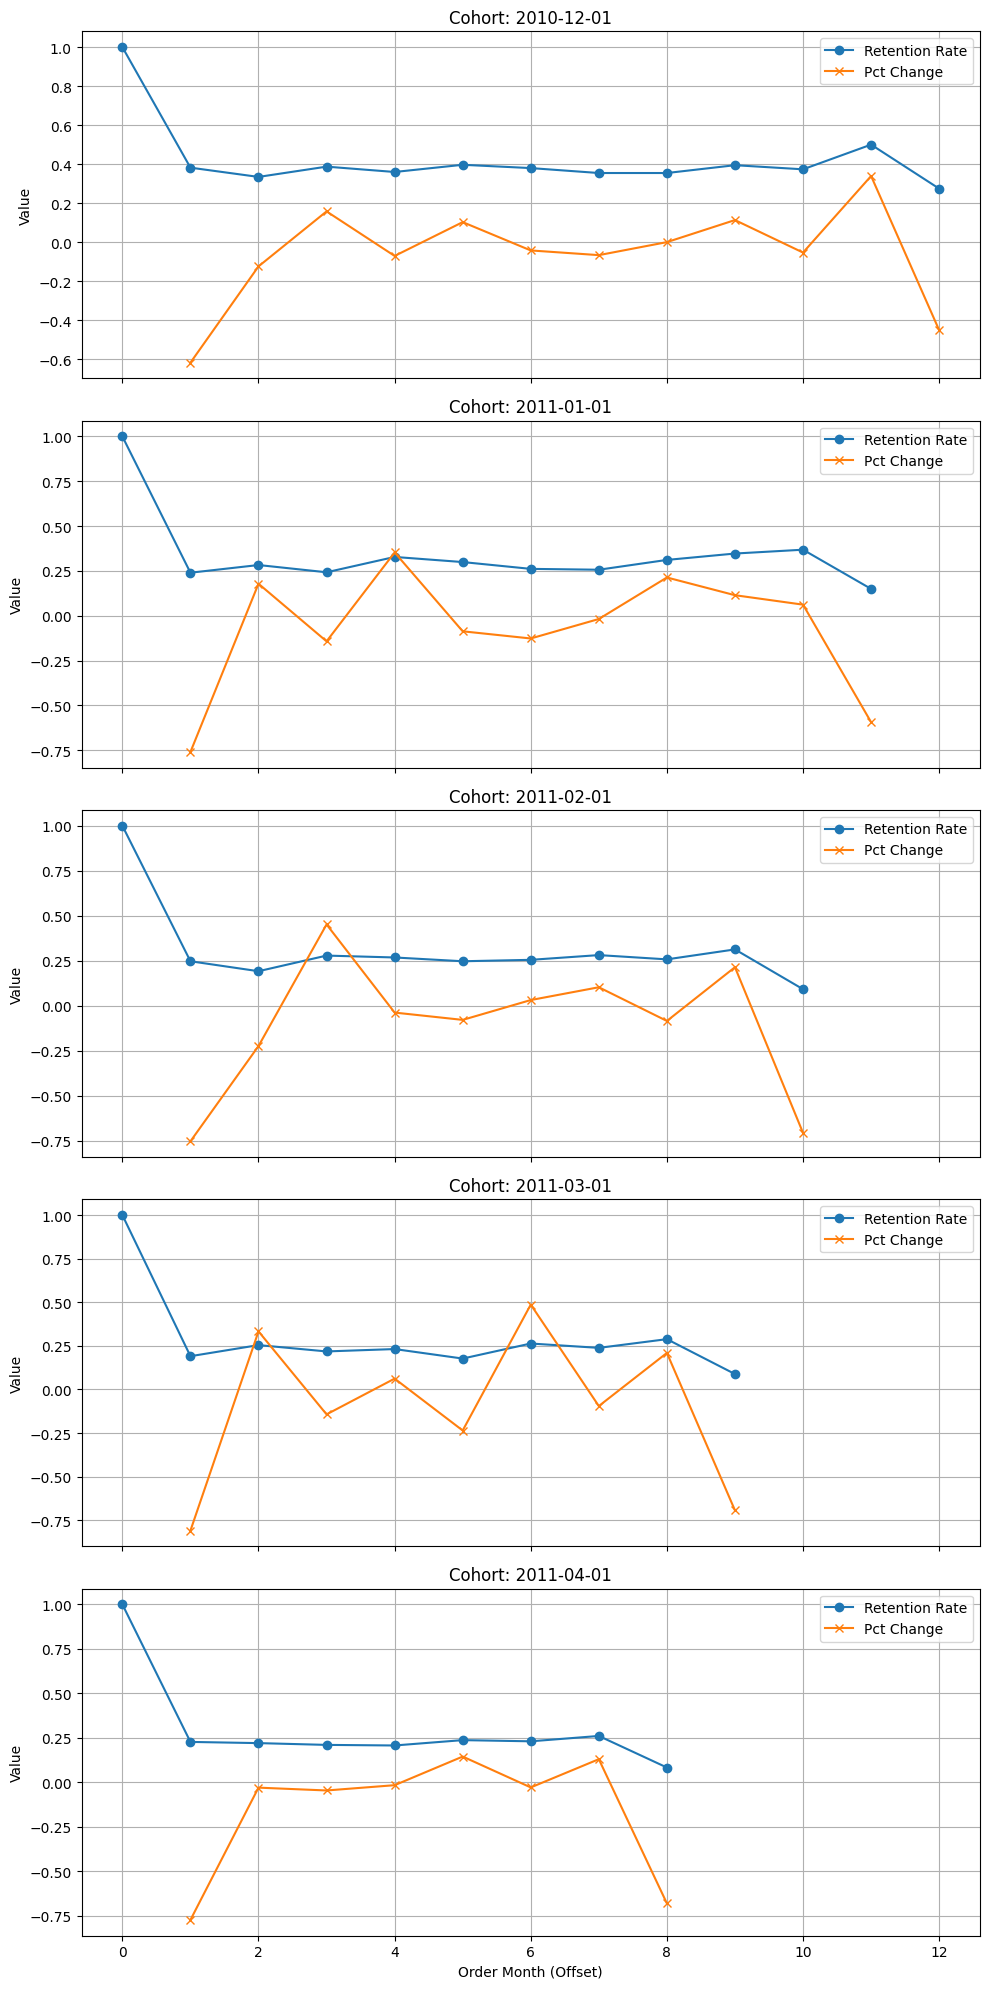

In [ ]:
# 원하는 기간으로 코호트 필터링 (예: 2010-12-01 ~ 2011-04-01)
mask = (df['cohort_month'] >= '2010-12-01') & (df['cohort_month'] <= '2011-04-01')
df_selected = df[mask]

# 각 코호트를 개별 서브플롯으로 시각화
unique_cohorts = sorted(df_selected['cohort_month'].unique())
n_cohorts = len(unique_cohorts)

fig, axs = plt.subplots(n_cohorts, 1, figsize=(10, 4*n_cohorts), sharex=True)
if n_cohorts == 1:
    axs = [axs]  # 서브플롯이 하나일 경우 리스트로 변환

for ax, cohort in zip(axs, unique_cohorts):
    sub = df_selected[df_selected['cohort_month'] == cohort]
    ax.plot(sub['order_month'], sub['retention_rate'], marker='o', label='Retention Rate')
    ax.plot(sub['order_month'], sub['pct_change_retention'], marker='x', label='Pct Change')
    ax.set_title(f'Cohort: {cohort.strftime("%Y-%m-%d")}')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

axs[-1].set_xlabel("Order Month (Offset)")
plt.tight_layout()
plt.show()

**인사이트**


*   대부분의 코호트는 두번째 달부터 급격히 감소한다. 평균24%
*   21년 11월이 재구매율이 31%로 높은것으로 볼 수 있다.- 블랙프라이데이(11월 4주 금요일) 추측(대대적인 행사이므로 바로 다음달 최저인 12%로 재구매 하락)
* 3월 9월에 재구매율이 전달에 비해 다소 상승하는건 새학기 프로모션 같음
*   리텐션율이 일시적으로 증가하는 부분은 프로모션이나 이벤트 영향으로 추측
* 2010-12 코호트는 전반적으로 높은 리텐션율을 보임-11월에 큰 행사 이후 12월에 행사가 없는것으로 보이는데 이는 정말 좋은 제품이나 꼭 필요한 물건을 산 구매자로 보임- 할인이 없어도 사는것을 보면 로열티를 보여줘 높은 구매를 보여줌(2021년 1월에 재구매하는것이 38%)



**Action Plan**



*   첫 구매 후, 고객에게 감사 메일이나 후기 작성 시 적립금 안내 알람을 발송하여 관심도를 유지
* 첫 달 이후 일정 기간 내 재구매 시 할인 쿠폰이나 리워드 포인트 증정을 통해 이탈을 방지.
* 11월의 대대적인 행사 효과를 분석하고, 행사 기간 동안 고객 관심을 극대화할 수 있는 추가 프로모션(예: 시간 한정 딜, 특별 번들 구성)을 진행
* 12월에도 후속 재구매 유도 이벤트(예: “행사 연장 혜택” 또는 “리마인더 할인”)를 계획하여 고객 유지율을 상승
* 매년 3월과 9월의 재구매 패턴을 정량적으로 분석하여, 신규 프로모션의 성과를 모니터링하고 성공 요인을 다른 코호트에도 확대 적용
* 프로모션 참여 고객 대상으로 만족도 조사를 실시해, 이벤트의 긍정적 영향과 개선점을 도출
* 높은 로열티를 보인 고객을 대상으로, VIP 프로그램, 멤버십 혜택, 특별 사은품 제공 등을 도입하여 장기 고객 충성도를 더욱 강화

